## Omar Al-Naimi

### This project is for developing logistic regression model for predicting patients' readmission within 30 days after discharge.

In [5]:
# importing data set = Hospital-Readmission.csv
import pandas as pd
my_dataset = pd.read_csv ('C:\\Users\\omar_\\Desktop\\Springboard DataScience\\Capstone Project\\my 1st project\\project progress\\Data_SecondarySource\\Hospital-Readmission.csv')

In [6]:
#checking my_dataset. it is 10,000 rows and 14 columns
my_dataset

,RowNumber,PatientInsuranceNO.,Surname,SES-CreditScore,HospitalLocation,Gender,Age,AdmisionPeriod/day,PreviousExpenses,NumOfPrevious admissions,HealthInsurance,RegularCheckup,EstimatedExpenses,Readmited
0,1,15634602,Hargrave,619,Manhattan,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,StatenIsland,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Manhattan,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Manhattan,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,StatenIsland,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,StatenIsland,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,Manhattan,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Bronx,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,Manhattan,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,Manhattan,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
# More checking about data set
rows= len (my_dataset)
columns= len (my_dataset.columns)
print (my_dataset.columns)
print ("Total Rows =", rows, " : Total Columns =", columns)

Index(['RowNumber', 'PatientInsuranceNO.', 'Surname', 'SES-CreditScore',
       'HospitalLocation', 'Gender', 'Age', 'AdmisionPeriod/day',
       'PreviousExpenses', 'NumOfPrevious admissions', 'HealthInsurance',
       'RegularCheckup', 'EstimatedExpenses', 'Readmited'],
      dtype='object')
Total Rows = 10000  : Total Columns = 14


In [8]:
#columns information shows correct data types, numbers, and non-null
my_dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber                   10000 non-null int64
PatientInsuranceNO.         10000 non-null int64
Surname                     10000 non-null object
SES-CreditScore             10000 non-null int64
HospitalLocation            10000 non-null object
Gender                      10000 non-null object
Age                         10000 non-null int64
AdmisionPeriod/day          10000 non-null int64
PreviousExpenses            10000 non-null float64
NumOfPrevious admissions    10000 non-null int64
HealthInsurance             10000 non-null int64
RegularCheckup              10000 non-null int64
EstimatedExpenses           10000 non-null float64
Readmited                   10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


---

In [9]:
# Data description (descriptive statistics) for important numerical columns
# subsetting columns
columns_subset= my_dataset [['Age','SES-CreditScore', 'AdmisionPeriod/day', 'PreviousExpenses', 'NumOfPrevious admissions', \
             'EstimatedExpenses']]
columns_subset.describe ().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
SES-CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
AdmisionPeriod/day,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
PreviousExpenses,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfPrevious admissions,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedExpenses,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


---

# A/B test visualization

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams ['figure.figsize'] =8,4
import warnings
warnings.filterwarnings ('ignore')
plt.style.use ("ggplot")

## Creating data subsets & visualize them

In [11]:
# This subset is for gender

male = my_dataset ['Gender'] =='Male'
female = my_dataset ['Gender'] =='Female'
admitted = my_dataset ['Readmited'] == 1
not_admitted = my_dataset ['Readmited'] == 0

male_admitted = my_dataset [male & admitted]
male_not_admitted = my_dataset [male & not_admitted]
female_admitted = my_dataset [female & admitted]
female_not_admitted = my_dataset [female & not_admitted]

In [12]:
# Visualization for gender

vis1 = male_admitted ['Gender'].value_counts()
vis2 = male_not_admitted ['Gender'].value_counts()
vis3 = female_admitted ['Gender'].value_counts()
vis4 = female_not_admitted ['Gender'].value_counts()

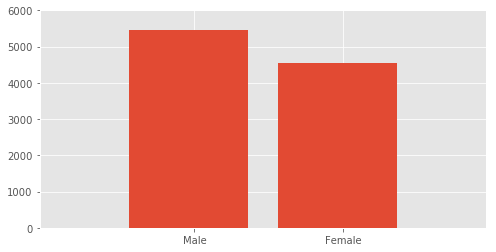

In [18]:
# Comparing the numbers of Males vs Females

plt.style.use ("ggplot")
from collections import Counter
c = Counter(my_dataset.Gender)

men = c['Male']
women = c['Female']

bar_heights = (men, women)
x = (1,2)

fig, ax = plt.subplots()
width = 0.8

ax.bar(x, bar_heights, width)

ax.set_xlim((0, 3))
ax.set_ylim((0, max(men, women)*1.1))

ax.set_xticks([i+width/20 for i in x])
ax.set_xticklabels(['Male', 'Female'])

plt.show()

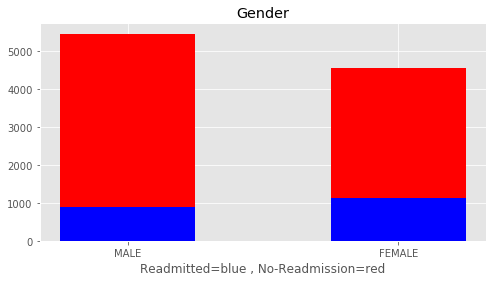

In [19]:
# Visualizing the actual numbers

A = [vis1, vis3]
B = [vis2, vis4]

X = (1,2)

plt.bar(X, A, color = 'b', width= 0.5)
plt.bar(X, B, color = 'r', bottom = A, width= 0.5)
plt.title ('Gender', )
plt.xticks ([i+width/20 for i in x])
plt.xlabel ('Readmitted=blue , No-Readmission=red')
plt.xticks(x)
plt.xticks([1, 2], ['MALE', 'FEMALE'])
plt.legend (loc= 1,bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2 )
plt.show()

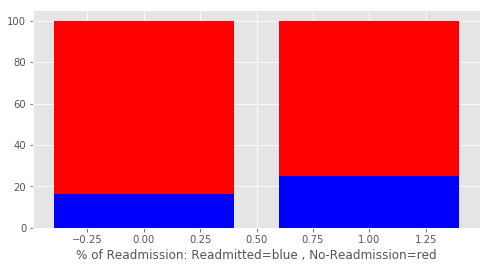

In [20]:
# Visualizing the percent
pool1 = vis1+vis2
vis1p = vis1 *100/pool1
vis2p = vis2*100/pool1
pool2 = vis3 +vis4
vis3p = vis3*100/pool2
vis4p = vis4*100/pool2
A = [vis1p, vis3p]
B = [vis2p, vis4p]

X = range(2)

plt.bar(X, A, color = 'b')
plt.bar(X, B, color = 'r', bottom = A)
plt.xlabel ('% of Readmission: Readmitted=blue , No-Readmission=red')
plt.show()

All other parameters can be visualized by the same method above

To be continued